# Project: Medical Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

* ‘ScheduledDay’ tells us on what day the patient set up their appointment.

* ‘Neighborhood’ indicates the location of the hospital.

* 'Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

* The last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In this analysis process we will try to compare multiple disease and will figure out which disease is more found among the people depending on their age group or gender, check what factors affect the people by which they attend the appointment and many more.

In [3]:
#importing all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [4]:
#load the dataset and view the first few lines of dataset
df=pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#using describe function to know insights of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here we have noticed that most of our data is in the form of 0 and 1's.
Looking at age column we see that the mean age is 37 going to a maximum of 115 but we can also see that the minimum age is -1 which we feel is incorrect and should be removed.

In [6]:
#checks how many columns and rows are present along with their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are a total of 110527 rows with 14 columns, we also don't have any missing data in any of the columns and also the data type of every column is also correct.

In [7]:
#checks the number of unique values for every column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

For the handicapped column we have 5 unique values and we do not have clarity on how these values a assigned so we will not consider this column for our analysis.

### Data Cleaning

In [8]:
#cleaning column labels using lambda function
df.rename(columns=lambda x: x.strip().lower().replace("-","_"), inplace=True)

We have cleaned the column labels by changing them to lower case and replacing "-" with "_" to make it more consistent.

In [9]:
#view the column labels to ensure changes made are correct
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
#dropping the incorrect age row
df.drop(df.query('age == "-1"').index, inplace=True)

Earlier we found out that there was an age -1 which we felt incorrect so we have removed it.

In [11]:
#checking if the changes made are correct
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

In [12]:
# removing the handcap column
del df['handcap']

As we had discussed earlier that we did not have clarity about the handcap column so have removed it.

In [13]:
#checking if the changes made are correct
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'sms_received', 'no_show'],
      dtype='object')

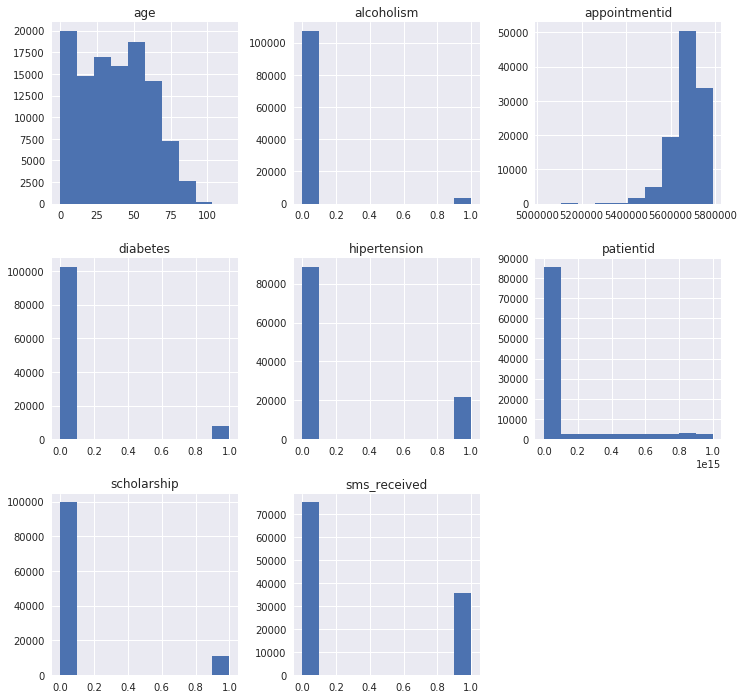

In [14]:
#producing histograms for our dataset
df.hist(figsize=(12,12));

* Here we can see that majority of the patients are children and the least are senior citizens.
* Very few are affected from alcoholism & diabetes in comparison to hipertension.
* Very few are enrolled in Brasilian welfare program Bolsa Família.

In [15]:
#saving the changes in new file
df.to_csv('no_show_appointments_v1.csv', index=False)

Now we have cleaned our data and saved it to a new file and will be starting with the exploration process.

<a id='eda'></a>
## Exploratory Data Analysis

Below questions will require to draw plots and we will be using same plots multiple time so we will define functions for drawing the plots first.

In [16]:
#defing a function for drawing a bar plot for single variable
def barplot1 (ht,ttl_msg):
    ht.plot(kind='bar', figsize=(6,6))
    plt.title(ttl_msg, fontsize=15)
    plt.xlabel('Age Group', fontsize=13)
    plt.ylabel('Number of affected people', fontsize=13);

In [17]:
#defing a function for drawing a bar plot for two variables
def barplot2 (x1, x2, v1, v2, ttl_msg):
    plt.bar([x1,x2],[v1,v2], width=0.35)
    plt.title(ttl_msg, fontsize=15)
    plt.xlabel('Types', fontsize=13)
    plt.ylabel('Percentage of people affected', fontsize=13)
    plt.show();

In [18]:
def barplot3 (x1, x2, x3,v1, v2, v3, ttl_msg):
    plt.bar([x1,x2,x3],[v1,v2,v3], width=0.35)
    plt.title(ttl_msg, fontsize=15)
    plt.xlabel('Types', fontsize=13)
    plt.ylabel('Percentage of people affected', fontsize=13)
    plt.show();

In [19]:
#defing a function for drawing a pie plot
def pie_plot(height,ttl_msg):
    height.plot(kind='pie', figsize=(6,6), fontsize=13)
    plt.title(ttl_msg, fontsize=15)
    plt.legend()
    plt.show();

### Research Question 1: What is the percentage of people suffering from alcoholism ?

In [20]:
#calculating the total no. of people
total=len(df.index)
total

110526

In [21]:
#calculating the total percentage of alcoholic people
alc_sf=((df.query('alcoholism == "1"').patientid.count())/total)*100
alc_sf

3.0400086857391022

In [22]:
#calculating the total percentage of non-alcoholic people
alc_nsf=((df.query('alcoholism == "0"').patientid.count())/total)*100
alc_nsf

96.95999131426089

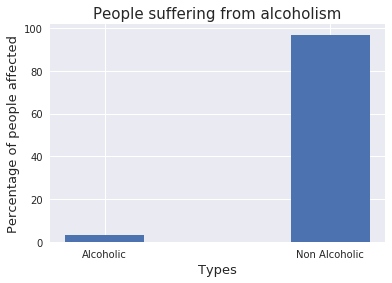

In [23]:
barplot2 ('Non Alcoholic', 'Alcoholic', alc_nsf, alc_sf, 'People suffering from alcoholism')

We can see that 3% of the people are affected by alcolism while almost 97% are non-alcoholic.

### Research Question 2: What is the percentage of people suffering from diabetes ?¶

In [24]:
#calculating the total percentage of diabetic people
dbt_sf=((df.query('diabetes == "1"').patientid.count())/total)*100
dbt_sf

7.186544342507645

In [25]:
#calculating the total percentage of non-diabetic people
dbt_nsf=((df.query('diabetes == "0"').patientid.count())/total)*100
dbt_nsf

92.813455657492355

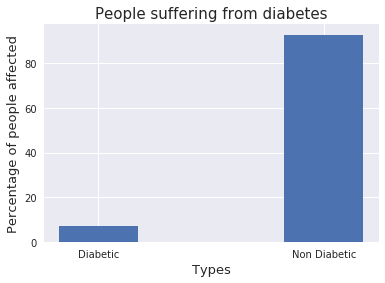

In [26]:
barplot2 ('Non Diabetic', 'Diabetic', dbt_nsf, dbt_sf, 'People suffering from diabetes')

We can see that 7% of the people are affected by diabetes while almost 93% are non-diabetic.

### Research Question 3: What is the percentage of people suffering from hipertension ?

In [27]:
#calculating the total percentage of people suffering from hipertension
hpt_sf=((df.query('hipertension == "1"').patientid.count())/total)*100
hpt_sf

19.724770642201836

In [28]:
#calculating the total percentage of people not suffering from hipertension
hpt_nsf=((df.query('hipertension == "0"').patientid.count())/total)*100
hpt_nsf

80.275229357798167

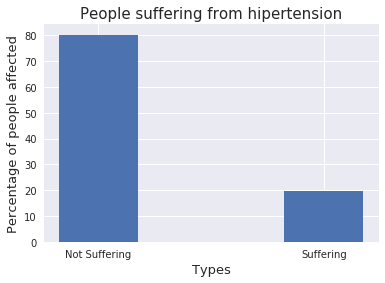

In [29]:
barplot2 ('Not Suffering', 'Suffering', hpt_nsf, hpt_sf, 'People suffering from hipertension')

We can see that 20% of the people are affected by hipertension while almost 80% are not affected.

### Research Question 4: Compare the diseases and check from which disease are the most people affected ?

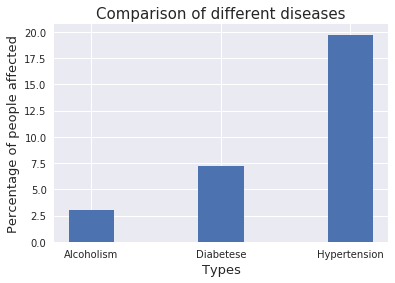

In [30]:
barplot3 ('Alcoholism', 'Diabetese', 'Hypertension',alc_sf, dbt_sf, hpt_sf, 'Comparison of different diseases')

We can clearly see that the people are most affected by hypertension and doctors shoul research and improve the medication for hypertension.

### Research Question 5: What percentage of patients are enrolled in Brasilian welfare program Bolsa Família.

In [31]:
#calculating the total percentage of people enrolled in Brasilian welfare program Bolsa Família.
sch_ys=((df.query('scholarship == "1"').patientid.count())/total)*100
sch_ys

9.8266471237536877

In [32]:
#calculating the total percentage of people not enrolled in Brasilian welfare program Bolsa Família.
sch_no=((df.query('scholarship == "0"').patientid.count())/total)*100
sch_no

90.173352876246312

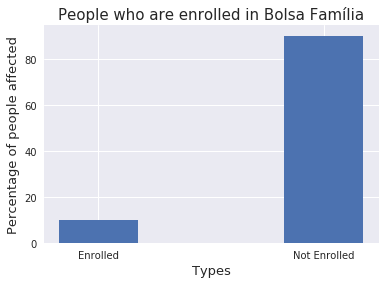

In [33]:
barplot2 ('Not Enrolled', 'Enrolled', sch_no, sch_ys, 'People who are enrolled in Bolsa Família')

Only 10% of the people are enrolled in Brasilian welfare program Bolsa Família.

### Research Question 6: What percentage of patients showed up to their appointments.

In [34]:
#calculating the total percentage of people who showed up to their appointments
apt_ys=((df.query('no_show == "No"').patientid.count())/total)*100
apt_ys

79.806561352080053

In [35]:
#calculating the total percentage of people who did not showed up to their appointments
apt_no=((df.query('no_show == "Yes"').patientid.count())/total)*100
apt_no

20.193438647919944

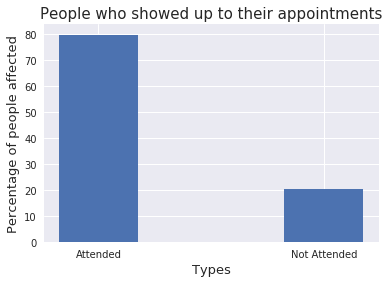

In [36]:
barplot2 ('Not Attended', 'Attended', apt_no, apt_ys, 'People who showed up to their appointments')

20% of the people did not showed up to their appointments while 80% did.

### Research Question 7: Compare the percentage of people who attended the appointment were enrolled in Bolsa Família. or not.

In [37]:
#calculating the no. of people who showed up at their appointments
apt_no=df.query('no_show == "No"').patientid.count()

In [38]:
#calculating the percentage of people who showed up at the appointment and were enrolled in Bolsa Família.
en_y=((df.query('no_show == "No" and scholarship == "1"').patientid.count())/apt_no)*100
en_y

9.390411191855522

In [39]:
#calculating the percentage of people who showed up at the appointment and were not enrolled in Bolsa Família.
en_n=((df.query('no_show == "No" and scholarship == "0"').patientid.count())/apt_no)*100
en_n

90.60958880814448

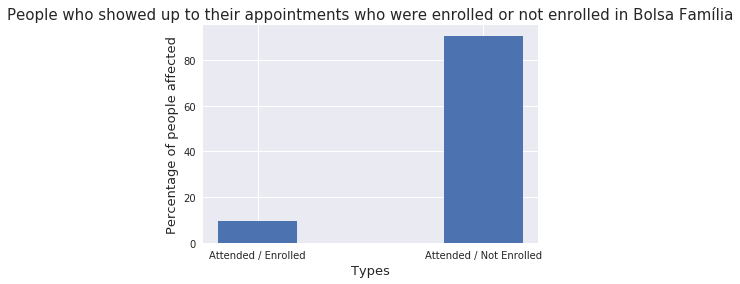

In [40]:
barplot2 ('Attended / Enrolled', 'Attended / Not Enrolled', en_y, en_n, 'People who showed up to their appointments who were enrolled or not enrolled in Bolsa Família')

Almost 91% of the patients were not enrolled but still showed up to their appointment.

### Research Question 8: Which age group is most affected by alcoholism ?

In [41]:
#checking the age statistics
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [42]:
#defining age groups
bin_edges=[0.0,18.0,37.0,55.0,115.0]
bin_names=['Child','Teenager','Adult','Senior']
#creating a new column for adding the age group
df['age_grp']=pd.cut(df['age'],bin_edges,labels=bin_names)

In [43]:
#grouping the data on the basis of age group and alcoholism
heights=df.query('alcoholism == "1"').groupby('age_grp')['alcoholism'].count()
heights

age_grp
Child         28
Teenager     556
Adult       1676
Senior      1100
Name: alcoholism, dtype: int64

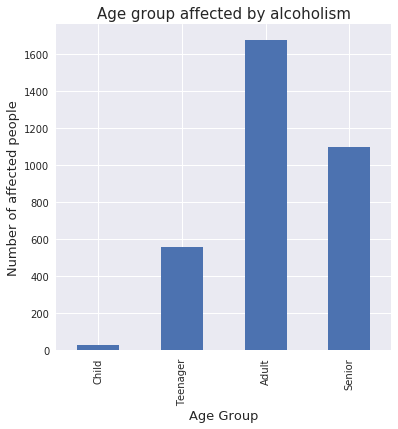

In [44]:
barplot1 (heights,'Age group affected by alcoholism')

We can see that adults are the most affected by alcoholism, followed by seniors and then teenagers.

### Research Question 9: Which age group is most affected by diabetese ?

In [45]:
#grouping the data on the basis of age group and diabetes
heights=df.query('diabetes == "1"').groupby('age_grp')['diabetes'].count()
heights

age_grp
Child         51
Teenager     332
Adult       2017
Senior      5543
Name: diabetes, dtype: int64

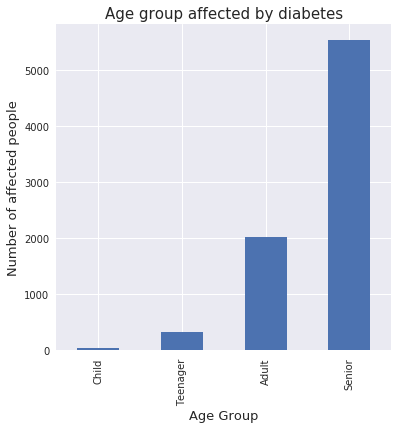

In [46]:
barplot1 (heights,'Age group affected by diabetes')

We can see that seniors are the most affected by diabetes, followed by adults and then teenagers.

### Research Question 10: Which age group is most affected by hipertension ?

In [47]:
#grouping the data on the basis of age group and hipertension
heights=df.query('hipertension == "1"').groupby('age_grp')['hipertension'].count()
heights

age_grp
Child          40
Teenager     1175
Adult        6435
Senior      14151
Name: hipertension, dtype: int64

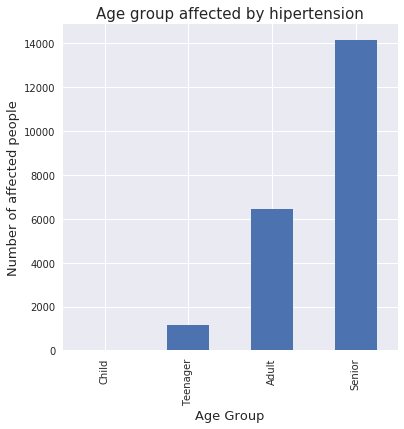

In [48]:
barplot1 (heights,'Age group affected by hipertension')

We can see that seniors are the most affected by diabetes, followed by adults and then teenagers.

### Research Question 11: Which age group showed up the most at their appointments ?

In [49]:
#grouping the data on the basis of age group and who showed up to their appointments
heights=df.query('no_show == "No"').groupby('age_grp')['no_show'].count()
heights

age_grp
Child       19619
Teenager    20836
Adult       21651
Senior      23201
Name: no_show, dtype: int64

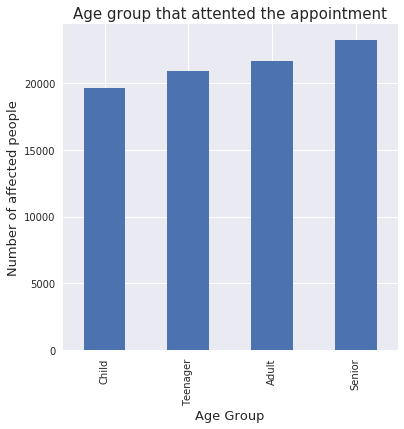

In [50]:
barplot1 (heights,'Age group that attented the appointment')

We can see that seniors showed up at their appointments more in comparison to adults, teenagers and children.

### Research Question 12: Which gender is most affected by alcoholism ?

In [51]:
#grouping the data on the basis of gender and alcoholism
alc_count=df.query('alcoholism == "1"').groupby('gender')['alcoholism'].count()
alc_count

gender
F    1223
M    2137
Name: alcoholism, dtype: int64

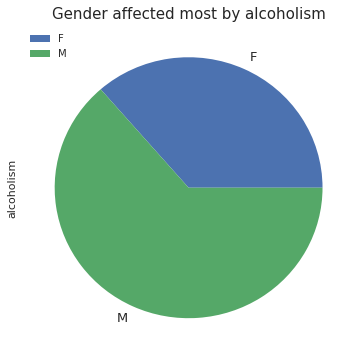

In [52]:
pie_plot(alc_count,'Gender affected most by alcoholism')

We can clearly see that males are more affected by alcoholism.

### Research Question 13: Which gender is most affected by diabetes ?

In [53]:
#grouping the data on the basis of gender and diabetes
dbt_count=df.query('diabetes == "1"').groupby('gender')['diabetes'].count()
dbt_count

gender
F    5606
M    2337
Name: diabetes, dtype: int64

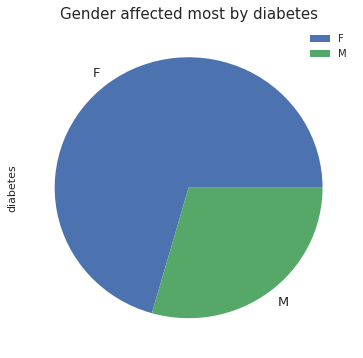

In [54]:
pie_plot(dbt_count,'Gender affected most by diabetes')

We can clearly see that females are more affected by diabetes.

### Research Question 14: Which gender is most affected by hipertension ?

In [55]:
#grouping the data on the basis of gender and hipertension
hpt_count=df.query('hipertension == "1"').groupby('gender')['hipertension'].count()
hpt_count

gender
F    15339
M     6462
Name: hipertension, dtype: int64

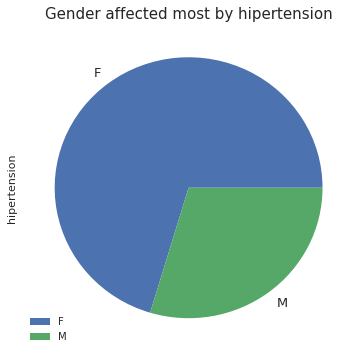

In [56]:
pie_plot(hpt_count,'Gender affected most by hipertension')

We can clearly see that females are more affected by hipertension.

### Research Question 15: Which hospitals were the most and least visited ?

In [57]:
#creating a new data frame  with only the patients who attended the appointment
df1=df.query('no_show == "No"')
#creating a pandas series for the neighbourhood column
hsp_ser=pd.Series(df1['neighbourhood'])
#calculating the number of people visited each hospital
hsp_grp=hsp_ser.value_counts()
#finding out the hospital with max visits
max1=hsp_grp.index[0]
#finding out the hospital with min visits
min1=hsp_grp.index[-1]
print('The hospital which people visited the most:',max1,'(with {} people visiting)'.format(hsp_grp.max()))
print('The hospital which people visited the least: ',min1,'(with {} people visiting)'.format(hsp_grp.min()))

The hospital which people visited the most: JARDIM CAMBURI (with 6252 people visiting)
The hospital which people visited the least:  PARQUE INDUSTRIAL (with 1 people visiting)


Here we finded out the hospitals with maximum and minimum visits.

<a id='limitations'></a>
## Limitations

> The following limitations were faced during the project:
* We had earlier removed the handicap column as it contained 5 unique values and we do not what the 5 values depict as other diseases have 2 unique values only, otherwise we could have done analysis for handicapped people as well.
* There is no correlation between the day on which the patient fixed the appointment, for what day it was fixed and whether the person showed up or not.
* The only trend we were able to analyse for showing up at the appointment was whether the patients were enrolled in Bolsa Família. or not.
* We should have more data on like economical status or any other relatable thing of patients by which we may analyze why a patient did not attended the appointment.

<a id='conclusions'></a>
## Conclusions

> We were able to find out the following things:
* Here we can see that majority of the patients are children and the least are senior citizens.
* 3% are alcoholic, 7% are diabetic and 19% are suffering from hipertension.
* Since hipertension is found to be affecting the maximum people so doctors should do more research and improve the medications for it.
* Only 10% patients are enrolled in Brasilian welfare program Bolsa Família.
* 20% of the people did not showed up to their appointments while 80% did.
* Almost 91% of the patients were not enrolled in Bolsa Família but still showed up to their appointment.
* Adults are the most affected by alcoholism, followed by seniors and then teenagers.
* Seniors are the most affected by diabetes, followed by adults and then teenagers.
* Seniors showed up at their appointments more in comparison to adults, teenagers and children.
* Males are more affected by alcoholism.
* Females are more affected by diabetes.
* Females are more affected by hipertension.
* Patients visited JARDIM CAMBURI hospital the most and PARQUE INDUSTRIAL hospital the least.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0